In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
homework = pd.read_csv('/Users/vi/DataspellProjects/шифт_обучение/27.03_Обработка_данных/Выбросы, пропуски/HomeWork.csv', index_col=0)
homework['date'] = pd.to_datetime(homework['date'])
homework.head()

,status,income,age,date
0,Student,4000.0,18.0,2022-01-23
1,Pensioner,NaN,91.0,2022-01-19
2,Student,4000.0,18.0,2022-01-03
3,Student,0.0,NaN,2022-01-13
4,Pensioner,5000.0,87.0,2022-01-31


In [3]:
#диапазон времени - ровно 1 месяц
homework['date'].min(), homework['date'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2022-02-01 00:00:00'))

In [4]:
homework.shape

(500, 4)

In [5]:
homework.describe()

,income,age
count,430.000000,441.000000
mean,152020.623256,46.362812
std,242647.036978,25.036517
min,-13745.000000,0.000000
25%,2000.000000,23.000000
50%,21000.000000,44.000000
75%,217000.000000,68.000000
max,992000.000000,99.000000


Есть отрицательные значения в зарплате, есть нулевые значения в возрасте, сделаем сразу их в nan

In [6]:
homework['income'] = homework['income'].replace([x for x in homework['income'] if x < 0], np.nan)
homework['age'] = homework['age'].replace(0, np.nan)

In [7]:
print('Количество NA:\n',  homework.isnull().sum())

Количество NA:
 status     10
income    129
age        69
date        0
dtype: int64


/var/folders/h_/3kybxlxs6rx2kx_p5g31jb0r0000gn/T/ipykernel_12231/2238072013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(homework['age'], kde=True)
/var/folders/h_/3kybxlxs6rx2kx_p5g31jb0r0000gn/T/ipykernel_12231/2238072013.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(homework['inc

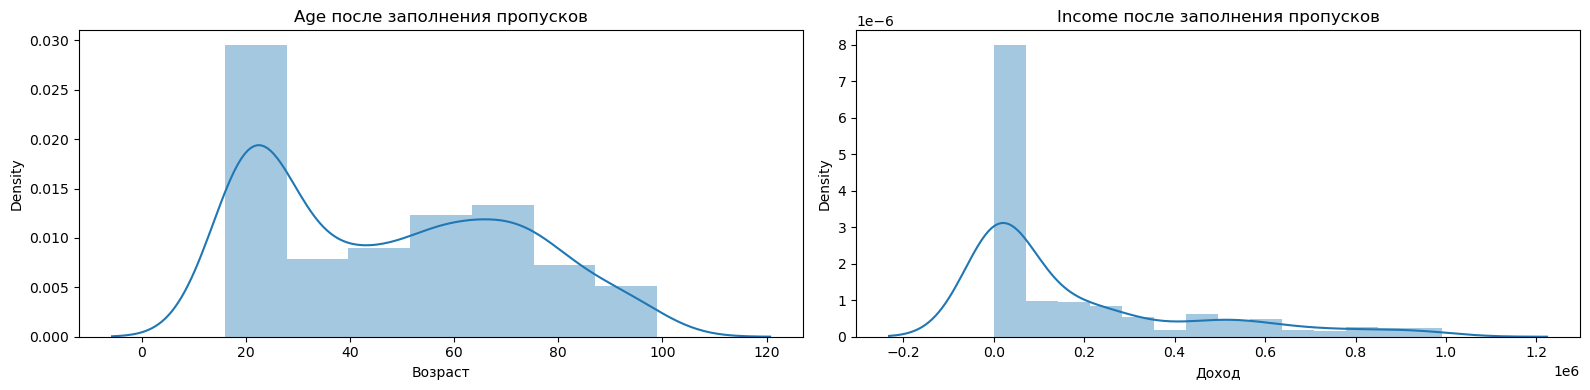

In [8]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(homework['age'], kde=True)
plt.title('Age после заполнения пропусков')
plt.xlabel('Возраст')

plt.subplot(1, 2, 2)
sns.distplot(homework['income'], kde=True)
plt.title('Income после заполнения пропусков')
plt.xlabel('Доход')

plt.tight_layout()
plt.show()

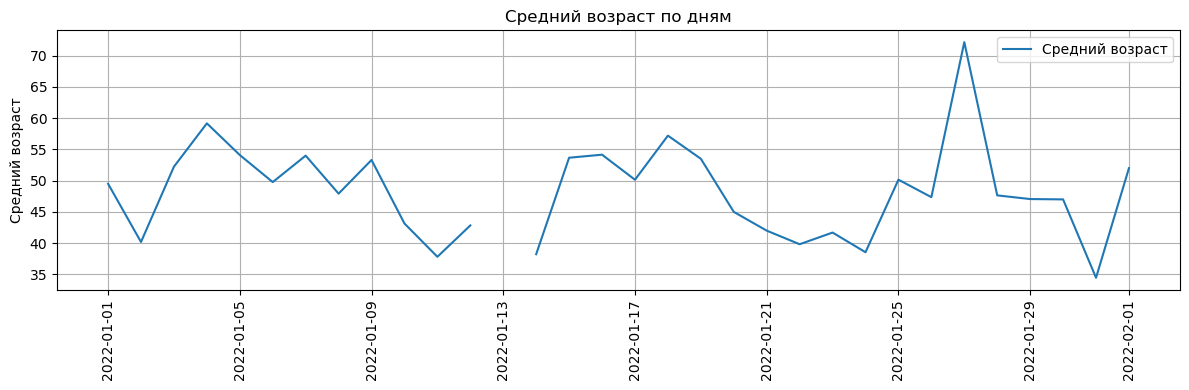

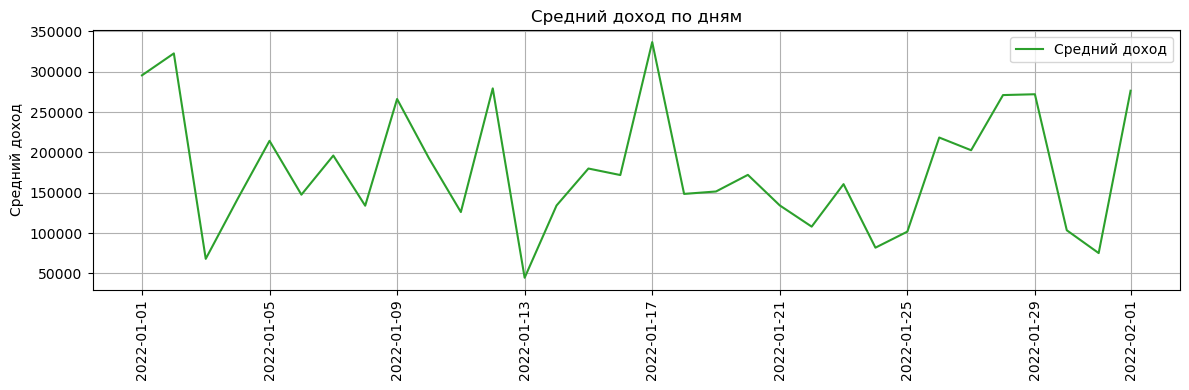

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(homework.resample('1d', on='date')['age'].mean(), label='Средний возраст', color='tab:blue')
plt.ylabel('Средний возраст')
plt.title('Средний возраст по дням')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(homework.resample('1d', on='date')['income'].mean(), label='Средний доход', color='tab:green') 
plt.ylabel('Средний доход')
plt.title('Средний доход по дням')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

13 января нет записей о возрасте, можно либо удалить, либо заполнить потом

In [10]:
homework[homework['date']=='2022-01-13']

,status,income,age,date
3,Student,0.0,NaN,2022-01-13
126,Pensioner,29000.0,NaN,2022-01-13
128,Student,2000.0,NaN,2022-01-13
143,Businessman,169000.0,NaN,2022-01-13
215,Working,110000.0,NaN,2022-01-13
271,Student,2000.0,NaN,2022-01-13
278,Pensioner,NaN,NaN,2022-01-13
349,Student,1000.0,NaN,2022-01-13
470,Student,NaN,NaN,2022-01-13


In [11]:
homework[homework['age'].isna()]

,status,income,age,date
3,Student,0.0,NaN,2022-01-13
16,Working,108000.0,NaN,2022-01-21
17,Student,3000.0,NaN,2022-01-15
44,Pensioner,8000.0,NaN,2022-01-10
69,Pensioner,17000.0,NaN,2022-01-06
...,...,...,...,...
486,Businessman,895000.0,NaN,2022-01-15
488,Student,4000.0,NaN,2022-01-16
490,Businessman,344000.0,NaN,2022-01-19
492,Pensioner,5000.0,NaN,2022-01-12


In [12]:
homework[homework['income']==0] #только студенты с нулевым доходом

,status,income,age,date
3,Student,0.0,NaN,2022-01-13
14,Student,0.0,18.0,2022-01-31
33,Student,0.0,26.0,2022-01-03
40,Student,0.0,21.0,2022-01-15
106,Student,0.0,26.0,2022-01-04
141,Student,0.0,20.0,2022-02-01
156,Student,0.0,23.0,2022-01-29
188,Student,0.0,25.0,2022-01-11
203,Student,0.0,NaN,2022-01-31
225,Student,0.0,23.0,2022-01-06


Посмотрим на выбросы по доходу

<Axes: xlabel='income'>

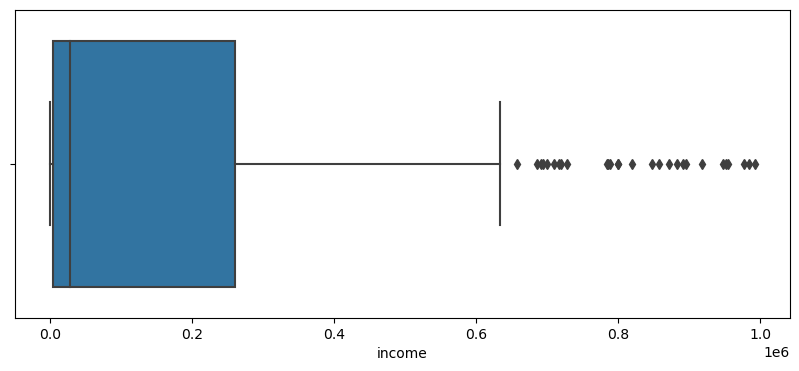

In [13]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=homework['income'])

Посмотрим выходит за пределы диапазона Q1-1,5(IQR) до Q3+1,5(IQR)

In [14]:
homework = homework.copy()
q75 = homework[[ 'income']].quantile(0.75)
q25 = homework[['income']].quantile(0.25)
iqr = q75 - q25
lower_threshold = q25.loc['income'] - 1.5*iqr['income']
upper_threshold = q75.loc['income'] + 1.5*iqr['income']

In [15]:
#Доход ниже нижней границы - их нет
homework.loc[(homework["income"]<=lower_threshold )]

,status,income,age,date


In [16]:
#Доход выше верхней границы
homework.loc[(homework["income"]>=upper_threshold )]

,status,income,age,date
7,Businessman,658000.0,73.0,2022-01-14
30,Businessman,951000.0,55.0,2022-01-02
42,Businessman,686000.0,80.0,2022-01-10
62,Businessman,891000.0,68.0,2022-01-01
112,Businessman,857000.0,60.0,2022-01-02
117,Businessman,800000.0,18.0,2022-01-12
125,Businessman,786000.0,NaN,2022-01-17
130,Businessman,871000.0,79.0,2022-01-16
147,Businessman,720000.0,75.0,2022-01-14
172,Businessman,984000.0,NaN,2022-01-01


<Axes: xlabel='income'>

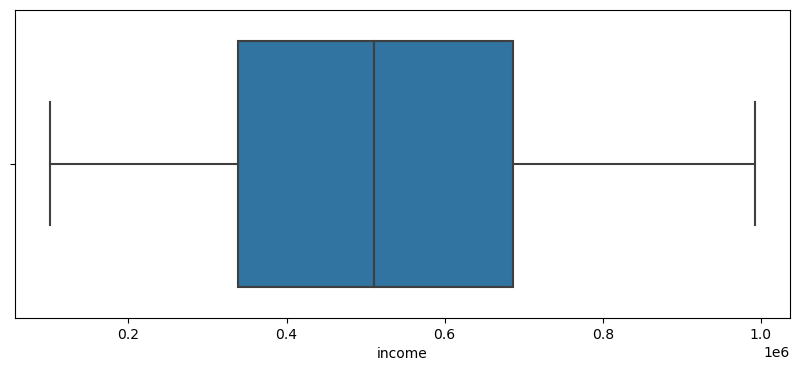

In [17]:
#Бизнесмены и один NAN которые по смыслу могут иметь большой доход, посмотрим на боксплот в разрезе бизнесменов
plt.figure(figsize=(10, 4))
sns.boxplot(x=homework[homework['status']=='Businessman']['income'])

Ниже порогового значения наблюдений нет, выше порогового значения только бизнесмены, которые по смыслу могут иметь высокий доход, в рамках доходов бизнесменов они не считаются выбросами, поэтому с ними я решила ничего не делать.
## Далее посмотрим на NA значения
Возможно стоит удалить значения, где 2 и более пропусков и один из них в статусе, потому что такое сложно восстановить

In [18]:
# Удаление строк, где нет данных в статусе и возрасте, не сможем скорее всего такие восстановить
rows_to_drop = homework[(homework['status'].isnull()) & (homework['age'].isnull())].index
homework = homework.drop(index=rows_to_drop)
homework.shape

(499, 4)

### Status

In [19]:
homework[homework['status'].isna()]

,status,income,age,date
35,NaN,286000.0,53.0,2022-01-30
65,NaN,NaN,76.0,2022-01-10
83,NaN,262000.0,35.0,2022-01-19
169,NaN,9000.0,85.0,2022-01-19
197,NaN,169000.0,59.0,2022-01-17
376,NaN,NaN,81.0,2022-01-12
378,NaN,NaN,16.0,2022-01-22
382,NaN,79000.0,24.0,2022-01-22
468,NaN,691000.0,54.0,2022-01-10


In [20]:
# Обновляем статус на 'Student' для строк, где status - NaN и возраст <= 18
homework.loc[(homework['status'].isna()) & 
             (homework['age'] <= 18), 'status'] = 'Student'

In [21]:
# Обновляем статус на 'Businessman' для строк, где status - NaN и income больше среднего по бизнесменам
homework.loc[(homework['status'].isna()) & 
             (homework['income'] >= homework[homework['status']=='Businessman']['income'].mean()), 'status']='Businessman'

In [22]:
# Обновляем статус на 'Pensioner' для строк, где status - NaN и возраст больше 65
homework.loc[(homework['status'].isna()) &
             (homework['age'] >= 65), 'status']='Pensioner'

In [23]:
# Обновляем статус на 'Working' для строк, где status - NaN - все остальные
homework.loc[(homework['status'].isna()), 'status']='Working'

In [24]:
homework.isnull().sum() #статусы заполнены

status      0
income    129
age        68
date        0
dtype: int64

## Age и Income
заполняю средними значениями по статусу

In [25]:
homework[homework['age'].isna()]

,status,income,age,date
3,Student,0.0,NaN,2022-01-13
16,Working,108000.0,NaN,2022-01-21
17,Student,3000.0,NaN,2022-01-15
44,Pensioner,8000.0,NaN,2022-01-10
69,Pensioner,17000.0,NaN,2022-01-06
...,...,...,...,...
486,Businessman,895000.0,NaN,2022-01-15
488,Student,4000.0,NaN,2022-01-16
490,Businessman,344000.0,NaN,2022-01-19
492,Pensioner,5000.0,NaN,2022-01-12


In [26]:
age_median=round(homework.groupby(['status'])['age'].median())
age_median

status
Businessman    54.0
Pensioner      77.0
Student        20.0
Working        42.0
Name: age, dtype: float64

In [29]:
income_median = homework.groupby('status')['income'].median()


In [30]:
for status in homework['status'].unique():
        homework.loc[(homework['status'] == status) & 
                     (homework['income'].isnull()), 'income']= round(homework.loc[homework['status'] == status,'income'].median())
        homework.loc[(homework['status'] == status) & 
                     (homework['age'].isnull()), 'age']=round(homework.loc[homework['status'] == status,'age'].median())

In [31]:
homework.isnull().sum() #NA больше нет

status    0
income    0
age       0
date      0
dtype: int64

In [32]:
homework

,status,income,age,date
0,Student,4000.0,18.0,2022-01-23
1,Pensioner,18000.0,91.0,2022-01-19
2,Student,4000.0,18.0,2022-01-03
3,Student,0.0,20.0,2022-01-13
4,Pensioner,5000.0,87.0,2022-01-31
...,...,...,...,...
495,Pensioner,28000.0,77.0,2022-01-30
496,Pensioner,16000.0,64.0,2022-01-20
497,Businessman,258000.0,43.0,2022-01-12
498,Student,4000.0,17.0,2022-01-19


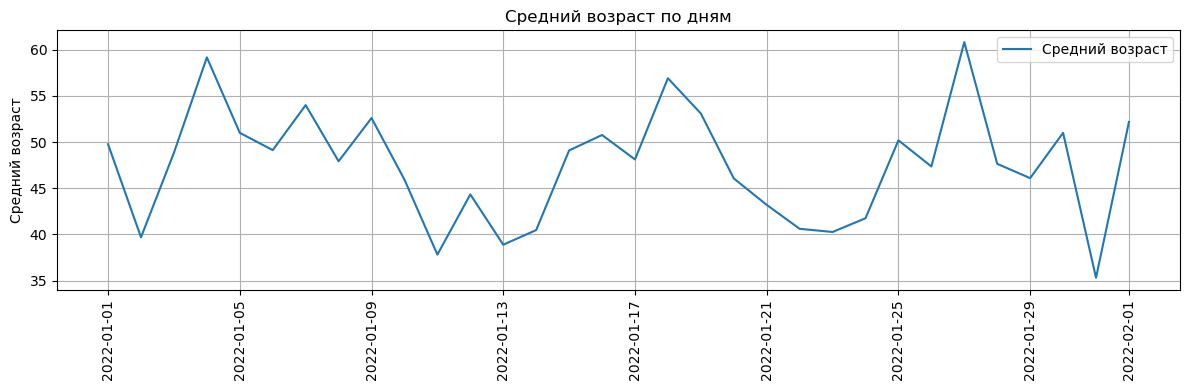

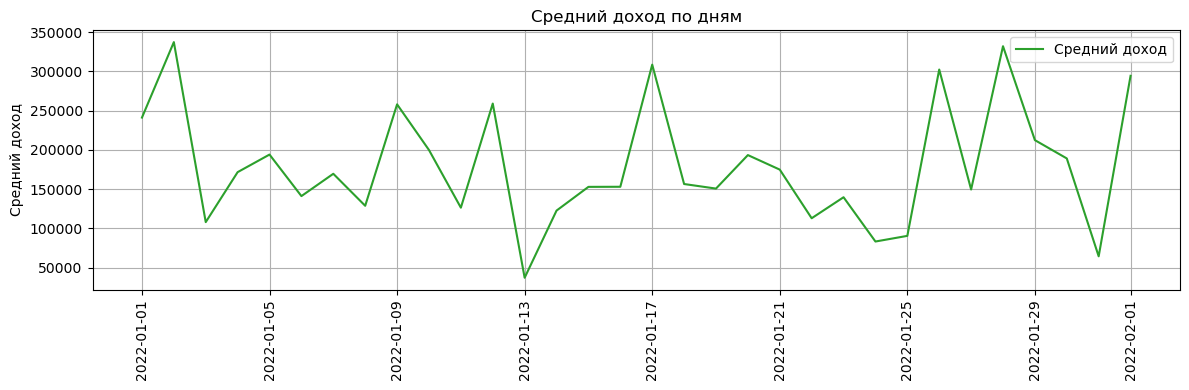

In [33]:
plt.figure(figsize=(12, 4))
plt.plot(homework.resample('1d', on='date')['age'].mean(), label='Средний возраст', color='tab:blue')
plt.ylabel('Средний возраст')
plt.title('Средний возраст по дням')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(homework.resample('1d', on='date')['income'].mean(), label='Средний доход', color='tab:green')
plt.ylabel('Средний доход')
plt.title('Средний доход по дням')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

/var/folders/h_/3kybxlxs6rx2kx_p5g31jb0r0000gn/T/ipykernel_12231/2321495193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(homework['age'],  hist=True)


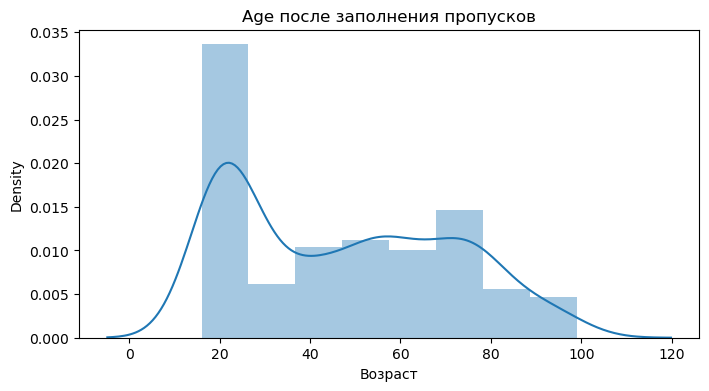

/var/folders/h_/3kybxlxs6rx2kx_p5g31jb0r0000gn/T/ipykernel_12231/2321495193.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(homework['income'],  hist=True)


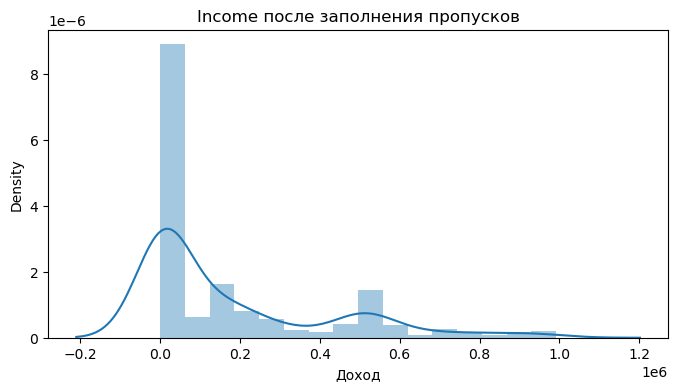

In [34]:
plt.figure(figsize=(8, 4))
sns.distplot(homework['age'],  hist=True)
plt.title('Age после заполнения пропусков')
plt.xlabel('Возраст')
plt.show()

plt.figure(figsize=(8, 4))
sns.distplot(homework['income'],  hist=True)
plt.title('Income после заполнения пропусков')
plt.xlabel('Доход')
plt.show()

/var/folders/h_/3kybxlxs6rx2kx_p5g31jb0r0000gn/T/ipykernel_12231/2238072013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(homework['age'], kde=True)
/var/folders/h_/3kybxlxs6rx2kx_p5g31jb0r0000gn/T/ipykernel_12231/2238072013.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(homework['inc

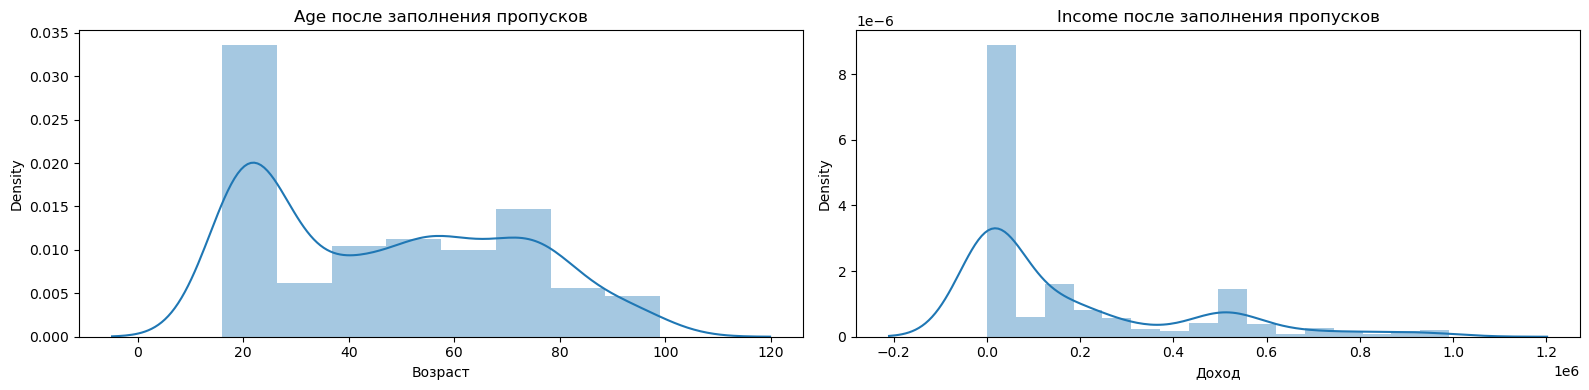

In [35]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(homework['age'], kde=True)
plt.title('Age после заполнения пропусков')
plt.xlabel('Возраст')

plt.subplot(1, 2, 2)
sns.distplot(homework['income'], kde=True)
plt.title('Income после заполнения пропусков')
plt.xlabel('Доход')

plt.tight_layout()
plt.show()